# **3. Logistic Regression**
* Machine learning의 구성요소 4가지를 하나씩 구현하며 logistic regression train 및 test 수행
<img src="Figure/ml_components.png" style="width:700px;height:300px;">

# **Task description**
* 고양이 이미지 12500개, 강아지 이미지 12500개로 이루어진 데이터셋에서 고양이와 강아지를 구분하는 task
* 예시 이미지:
<img src="../1_materials/dataset/cat.1.jpg" style="width:200px;height:200px;">
<img src="../1_materials/dataset/dog.1986.jpg" style="width:200px;height:200px;">


## **구성요소 1: Input data**
* 이미지 파일을 불러와서 dataset 구성 (x: 이미지 값, y: 라벨)
* 전체 dataset을 train과 test로 나눔



### Step 1. 필요한 libirary import 

In [23]:
import os 
import cv2 # 이미지를 load하는 library
import numpy as np

import matplotlib.pyplot as plt # 이미지를 plot하는 library
%matplotlib inline

#### (Image 관련 짧은 tutorial)
* python에는 여러 이미지 관련 library가 있고 그 중에서 cv2 사용


Loaded image (matrix values)
[[[ 87 164 203]
  [ 87 164 203]
  [ 88 165 204]
  ...
  [122 201 240]
  [121 200 239]
  [120 199 238]]

 [[ 87 164 203]
  [ 87 164 203]
  [ 88 165 204]
  ...
  [123 202 241]
  [122 201 240]
  [120 199 238]]

 [[ 87 164 203]
  [ 87 164 203]
  [ 88 165 204]
  ...
  [123 202 241]
  [122 201 240]
  [121 200 239]]

 ...

 [[ 55 122 153]
  [ 55 122 153]
  [ 55 122 153]
  ...
  [  0   2   2]
  [  0   2   2]
  [  0   2   2]]

 [[ 54 121 152]
  [ 54 121 152]
  [ 54 121 152]
  ...
  [  0   2   2]
  [  0   2   2]
  [  0   2   2]]

 [[ 53 120 151]
  [ 53 120 151]
  [ 53 120 151]
  ...
  [  0   1   1]
  [  0   1   1]
  [  0   1   1]]]
Loaded image


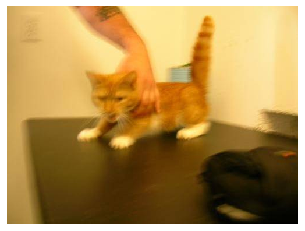

In [24]:
img_path = '../1_materials/dataset_5000/cat.0.jpg'
# 이미지 읽기
img = cv2.imread(img_path)
print('Loaded image (matrix values)')
print(img)

# 이미지 보기
print('Loaded image')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

###  Step2. Dataset 구성
* 이미지를 불러와서 64x64로 resize (원본 이미지는 이미지 크기가 제각각이며 너무 큼)
* 이미지 값을 가지고 있는 X와 이미지에 대한 label을 가지고 있는 y를 구성 

In [25]:
dataset_directory = '../1_materials/dataset' # 'dataset' 폴더
cat_class = 1
cat_class_keyword = 'cat' # 'cat'을 포함하는 이미지는 cat class로

dog_class = 0
dog_class_keyword = 'dog' # 'dog'을 포함하는 이미지는 dog class로

# 원하는 이미지 사이즈 정의
img_rows = 64
img_cols = 64
img_channel = 3 # RGB

# 이미지 읽어서 64x64로 resize 하고 변수에 저장
img_list = os.listdir(dataset_directory)
num_data = len(img_list)

X = np.empty((num_data, img_rows, img_cols, img_channel), dtype = int) # 이미지 데이터
y = np.empty((num_data,1), dtype = int) # 라벨
for i_iter, i_img in enumerate(img_list):
    # 이미지 읽어서 X에 저장    
    img_path = os.path.join(dataset_directory, i_img)
    img = cv2.imread(img_path,cv2.IMREAD_COLOR)
    img_resize = cv2.resize(img, (img_rows, img_cols), interpolation=cv2.INTER_CUBIC)
    X[i_iter] = img_resize
    
    # 라벨 읽어서 y에 저장. 이미지 이름에 'cat'혹은 'dog'를 포함하는지로 판별
    if cat_class_keyword in i_img:
        y[i_iter] = cat_class
    elif dog_class_keyword in i_img:
        y[i_iter] = dog_class
    else:
        print("Image name is strange")
        raise AssertionError
    if i_iter%1000 == 0: 
        print('Processed {} of {}'.format(i_iter, num_data))
        
    
    


Processed 0 of 25000
Processed 1000 of 25000
Processed 2000 of 25000
Processed 3000 of 25000
Processed 4000 of 25000
Processed 5000 of 25000
Processed 6000 of 25000
Processed 7000 of 25000
Processed 8000 of 25000
Processed 9000 of 25000
Processed 10000 of 25000
Processed 11000 of 25000
Processed 12000 of 25000
Processed 13000 of 25000
Processed 14000 of 25000
Processed 15000 of 25000
Processed 16000 of 25000
Processed 17000 of 25000
Processed 18000 of 25000
Processed 19000 of 25000
Processed 20000 of 25000
Processed 21000 of 25000
Processed 22000 of 25000
Processed 23000 of 25000
Processed 24000 of 25000


#### (만든 데이터 확인)

In [5]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)
print('y values: ', y[:5])

X shape:  (25000, 64, 64, 3)
y shape:  (25000, 1)
y values:  [[1]
 [1]
 [0]
 [1]
 [1]]


* 불러온 X를 1차원 vector 형식으로 바꿈


In [6]:
X_vector = np.reshape(X, (X.shape[0], -1))
print(X_vector.shape)

(25000, 12288)


#### 최종 데이터셋이 잘 만들어졌는지 확인 (image 보기)

In [7]:
classes = {0:'dog',
           1:'cat'}
def show_image(X,y,idx):
    image = X[idx]
    image = np.reshape(image, (img_rows, img_cols, img_channel))
    plt.figure(figsize=(4,2))
    plt.axis('off')
    plt.imshow(image)
    plt.title("This is a {}.".format(classes[y[idx,0]]))
    plt.show()

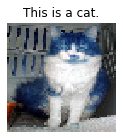

In [8]:
show_image(X_vector, y, 19000)

* Dataset을 train/test로 나눔
* train:test = 80:20으로 나눔.
* 전체를 random하게 섞어서 나눔

In [9]:
train_ratio = 0.8
test_ratio = 0.2

dataset_idx_all = np.arange(num_data)
print('original index: ', dataset_idx_all)
np.random.shuffle(dataset_idx_all)
print('shuffled index: ', dataset_idx_all)

num_test_data = int(num_data * test_ratio)
dataset_idx_test = dataset_idx_all[:num_test_data]
dataset_idx_train = dataset_idx_all[num_test_data:]


# train set
X_vector_train = X_vector[dataset_idx_train]
y_train = y[dataset_idx_train]

X_vector_test = X_vector[dataset_idx_test]
y_test = y[dataset_idx_test]

original index:  [    0     1     2 ... 24997 24998 24999]
shuffled index:  [ 9716 13941 18660 ...  1505 14511 11978]


## **<학습단계>**

## **2. Model**

### Sigmoid function

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## **3. Obejctive function**
* 데이터가 여러 개 일때는 PPT의 objective funciton을 데이터 개수로 나눠줘야함 (평균)

In [11]:
def compute_objective(X, y, params):
    m = y.shape[0]
    y_hat = sigmoid(X @ params)
    epsilon = 1e-5
    objective = (1/m)*(((-y).T @ np.log(y_hat + epsilon))-((1-y).T @ np.log(1-y_hat + epsilon)))
    return objective

## **4. Optimizer**
* iterations 만큼 gradient descent update를 수행하고 각 iteration에서 나온 objective function이 값들을 objective_history에 저장함.

In [12]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    objective_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 

        objective_history[i] = compute_objective(X, y, params)
        if i%100 ==0:
            print('Gradient descent progress: ', i, '/',  iterations)
            print('Current objective function value: ',objective_history[i])
        if i%1000 ==0:
            param_save_dir = 'train_results'
            if not os.path.exists(param_save_dir):
                os.mkdir(param_save_dir)
            param_save_dir_path = os.path.join(param_save_dir, 'param' + str(i)+'.npy')
            np.save(param_save_dir_path, params)
        
    return (objective_history, params)

## **Putting it altogether: Train**

In [ ]:
dim_feature = X_vector_train.shape[1]
# initialize paremters of the model as zero (w,b in PPT)
params = np.zeros((dim_feature, 1))

iterations = 20000
learning_rate = 0.01

initial_objective_value = compute_objective(X_vector_train, y_train, params)
print("Initial Cost is: {} \n".format(initial_objective_value))


(objective_history, params_optimal) = gradient_descent(X_vector_train, y_train, params, learning_rate, iterations)



## **<Test 단계>**
* testset에 있는 이미지들을 학습된 model에 통과 시켜 고양이에 대한 확률 얻음
* 0.5를 기준으로 0.5 보다 높은 확률은 고양이, 낮은 확률은 강아지로 prediction

In [14]:
# 학습된 parameter 불러오기
params_optimal = np.load('../1_materials/train_results/param19000.npy')
num_test_data = X_vector_test.shape[0]
num_correct_sample = 0

correct_X = []
correct_y = []

wrong_X = []
wrong_y = []
for i in range(num_test_data):
    cur_X_vector = X_vector_test[i]
    cur_y_hat = sigmoid(cur_X_vector @ params_optimal)
    y_predict = round(cur_y_hat[0])
    if y_predict == y_test[i,0]:
        num_correct_sample +=1
        correct_X.append(cur_X_vector)
        correct_y.append(y_predict)
    else:
        wrong_X.append(cur_X_vector)
        wrong_y.append(y_predict)

print('Accuracy: ', (num_correct_sample/num_test_data)*100,'%')

Accuracy:  55.24 %


/home/robotics/anaconda2/envs/py36_SNUR/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


### Test 결과 확인


In [15]:
classes = {0:'dog',
           1:'cat'}
def show_test_result(X,y,idx):
    image = X[idx]
    image = np.reshape(image, (img_rows, img_cols, img_channel))
    plt.figure(figsize=(4,2))
    plt.axis('off')
    plt.imshow(image)
    plt.title("Prediction: {}".format(classes[y[idx]]))
    plt.show()

Correctly classified test images


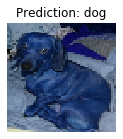

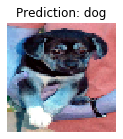

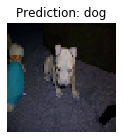

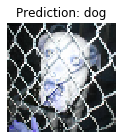

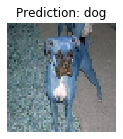

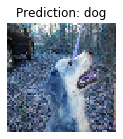

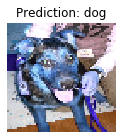

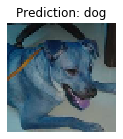

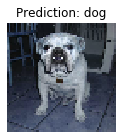

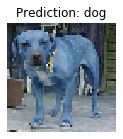

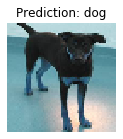

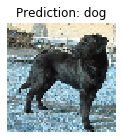

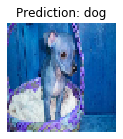

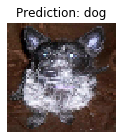

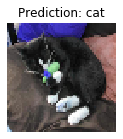

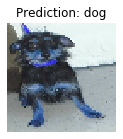

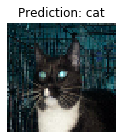

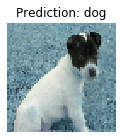

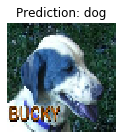

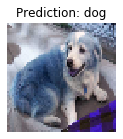

In [16]:
num_img_to_see = 20
# Correct
print('Correctly classified test images')
see_idx = np.random.randint(0, len(correct_y),num_img_to_see )
for i in see_idx:
    show_test_result(np.array(correct_X), np.array(correct_y), i)
    

# **Logistic Regression using sklearn library**

## Step 1. Import logistic regression from sklearn library

In [17]:
from sklearn.linear_model import LogisticRegressionCV # logistic regression model
from sklearn.metrics import confusion_matrix # confusion matrix performance metric

import pickle # library for save training results.
import itertools # library for plot confusion matrix

## Step 2. Define the logistic regression classifier (altogher: model, optimizer, objective function) (**Only one line code!!**)

In [18]:
clf = LogisticRegressionCV()
print(clf)

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)


## Step 3. Put input data into the classifier and run training (**Only one line code!!**)

In [ ]:
clf.fit(X_vector_train, y_train.ravel())

In [20]:
# save the model to disk
sklearn_save_dir = 'train_results/sklearn'
if not os.path.exists(sklearn_save_dir):
    os.mkdir(sklearn_save_dir)
filename = os.path.join(sklearn_save_dir, 'final_trained_result.pkl')
pickle.dump(clf, open(filename, 'wb'))

## Step 4. Test: 정확도 및 confusion matrix (using sklearn)

### Function for plot confusion matrix

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 정확도 및 confusion matrix plot

/home/robotics/anaconda2/envs/py36_SNUR/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegressionCV from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Model accuracy: 72.00%
Confusion matrix, without normalization
[[1769  742]
 [ 658 1831]]


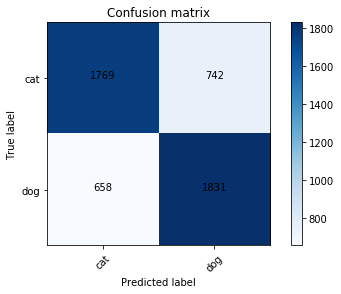

In [22]:
# 학습된 parameter 불러오기
clf_trained = np.load('../1_materials/train_results/sklearn/final_trained_result.pkl', allow_pickle=True)
print("Model accuracy: {:.2f}%".format(clf_trained.score(X_vector_test, y_test.ravel())*100))
plot_confusion_matrix(confusion_matrix(y_test.ravel(), clf_trained.predict(X_vector_test)), ['cat', 'dog'])